In order to complete the capstone project, it is necessary to join data from the nflgame API and data scraped from the Fantasy league hosting site (No API available.)  Multpile challenges that were not apparent at the beginning of this project arose.  Some were straight forward, but tedious (ie: significant string manipulation to capture data from various tables that lacked a common format.

More challenging was the fact that there are multiple player name conventions across the websites, there are differing conventions on how to account for a player's team (current game versus end of season) which impacts players traded or released and picked off the waiver wire mid-season.)  Finally, at least one key player (A. Kamara) is returned from the API with multiple positions (WR and RB).  This error affect calculations ranging from total team points to oppositition points to position.

None of this was apparent until comparing three top teams from the recently completed 2017 season.  This chart clearly showed missing fantast points for "Pete" did not match the points reported by the hosting site.  That chart has been recreated below and is marked original.



In [45]:
# import nflgame
# Full_Albert.csv nonsense name for inclusion in this demonstration notebook only.

import pandas as pd
import player_methods

#roster_data_file="C:\\Users\\Bill\\Desktop\\Football Stuff\\Loco Actual Rosters\\Full_Albert.csv"
roster_data_file="Go_Pats.csv"
roster_df=pd.read_csv(roster_data_file)

print roster_df.head()

print 'Done'

   Unnamed: 0  Unnamed: 0.1  week  team_num          Team       player_name  \
0           0             0     2         1  5/30 Brewing  Matthew Stafford   
1           1             1     2         1  5/30 Brewing    Marshawn Lynch   
2           2             2     2         1  5/30 Brewing     Ty Montgomery   
3           3             3     2         1  5/30 Brewing     Pierre Garcon   
4           4             4     2         1  5/30 Brewing       Tyreek Hill   

  pos nfl_team  Status  FPTs  
0  QB      DET  Active  13.0  
1  RB      OAK  Active  11.0  
2  RB       GB  Active  28.0  
3  WR       SF  Active   5.0  
4  WR       KC  Active   8.0  
Done


Following graph shows team performances after data fixed.  Note:  Weekly total now match expected values.

This chart represents the results that were originally sought.  The goal was to compare top teams within a particular league.  As background, B2B and Pete employed a similar strategy of focusing on "stud" players, while SAM employed a "moneyball" or best average strategy.

Given the final standings, and total point differential, the expected result was a more clear gap between weekly performances of the two strategies.  The fact that on a weekly basis, there was a relatively small difference between the outcomes drives further analysis to look at specific positions.



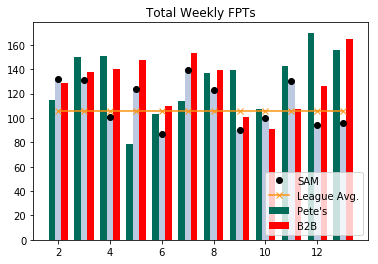

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.figure import Figure

df1=roster_df.loc[(roster_df.team_num==3)&(roster_df.Status=="Active"),["week","team_num","Team","pos","FPTs"]]
position_group = df1.groupby('week')
position_totals =position_group.sum()

df2=roster_df.loc[(roster_df.team_num==11)&(roster_df.Status=="Active"),["week","team_num","Team","pos","FPTs"]]
SAM_group = df2.groupby('week')
SAM_totals =SAM_group.sum()

df3=roster_df.loc[(roster_df.team_num==6)&(roster_df.Status=="Active"),["week","team_num","Team","pos","FPTs"]]
B2B_group = df3.groupby('week')
B2B_totals =B2B_group.sum()

df4=roster_df.loc[(roster_df.Status=="Active"),["week","team_num","Team","pos","FPTs"]]
ALL_group = df4.groupby('week')
ALL_totals = ALL_group.sum()
median_points=[ALL_totals.FPTs.median()/12 for x in ALL_totals.FPTs]

x = position_totals.index.values
y1= list(position_totals.FPTs.values)
y2=list(SAM_totals.FPTs.values)
y3=list(B2B_totals.FPTs.values)

ax = plt.subplot(111)
ax.bar(x-0.25, y1,width=0.25,color='#016c59',align='center',label="Pete's")
ax.bar(x, y2,width=0.25,color='#bdc9e1',align='center')
ax.bar(x+.25, y3,width=0.25,color='r',align='center',label='B2B')

ax.plot(x,y2,'o', lw=2, color='k', label='SAM')
ax.plot(x,median_points,'x-',color='#fe9212', label="League Avg.")

plt.title("Total Weekly FPTs")
ax.legend(loc='lower right',)

plt.show()

Three things become clear when slicing by position.  First, among three of the top teams, most weeks, the points from active RBs were similar across the two strategies.  The main difference was in upside.  All three teams were typically above the league median, but, SAM's best average strategy did not have any weeks where they score significantly more points from RBs than the other top teams.

Contrast that to Pete, who had significant RB upsides (and associated wins) in 5 weeks (2,3,4,9 and 13) and B2B had signicant upside contributions from RBs in weeks 5 and 6, with decidedly poorer performance later in the season.  This corresponds to Exiekel Elliot's suspension time period.

In [47]:
# repetitive function for slicing to compar top three teams.  Only used in the excercise for class, more useful code in
#actual analysis

def repetitive_slicing(plpos):
    df1=roster_df.loc[(roster_df.team_num==3)&(roster_df.pos==plpos)&(roster_df.Status=="Active"),["week","team_num","Team","pos","FPTs"]]
    position_group = df1.groupby('week')
    position_totals = position_group.sum()

    df2=roster_df.loc[(roster_df.team_num==11)&(roster_df.pos==plpos)&(roster_df.Status=="Active"),["week","team_num","Team","pos","FPTs"]]
    SAM_group = df2.groupby('week')
    SAM_totals = SAM_group.sum()


    df3=roster_df.loc[(roster_df.team_num==6)&(roster_df.pos==plpos)&(roster_df.Status=="Active"),["week","team_num","Team","pos","FPTs"]]
    B2B_group = df3.groupby('week')
    B2B_totals = B2B_group.sum()


    df4=roster_df.loc[(roster_df.pos==plpos)&(roster_df.Status=="Active"),["week","team_num","Team","pos","FPTs"]]
    ALL_group = df4.groupby('week')
    ALL_totals = ALL_group.sum()
    median_points=[ALL_totals.FPTs.median()/12 for x in ALL_totals.FPTs]
    
    fig = Figure()

    x = position_totals.index.values
    y1= list(position_totals.FPTs.values)
    y2=list(SAM_totals.FPTs.values)
    y3=list(B2B_totals.FPTs.values)

    ax = plt.subplot(111)
    ax.bar(x-0.25, y1,width=0.25,color='#016c59',align='center',label="Pete's")
    ax.bar(x, y2,width=0.25,color='#bdc9e1',align='center')
    ax.bar(x+.25, y3,width=0.25,color='r',align='center',label='B2B')

    ax.plot(x,y2,'o', lw=2, color='k', label='SAM')
    ax.plot(x,median_points,'x-',color='#fe9212', label="League Avg.")

    ax.legend(loc='best')

    title=plpos+"s points by week"
    plt.title(title)
    return

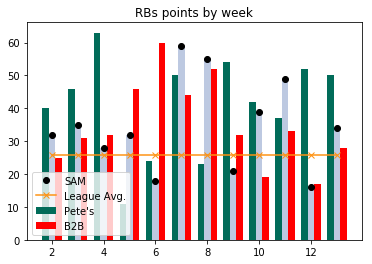

In [48]:
plpos='RB'

repetitive_slicing(plpos)
plt.legend(loc="lower left")
plt.show()

plt.show()

Changing the slice to QBs, another key thing becomes clear.  When Aaron Rodgers was injured, SAM took a significant hit in performance that was difficult to recover from.  At the time of his injury, Rodgers was on track to be the number one or two QB in the league.

B2B had been employing a value strategy at QB.  Jameis Winston is a decent QB in NFL terms (winning actual NFL games) but typically is a mid level performer in fantasy terms.  B2B was able to get by with tis choice because he was strong in other areas.  He was hurt in week 8, and the impact on the B2B team is obvious.



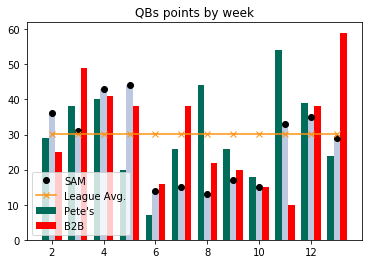

In [49]:
plpos='QB'
repetitive_slicing(plpos)
plt.legend(loc="lower left")
plt.show()

The review of WRs was uninsightful other than to highlight the fact that the top teams had strategies that were roughly equivalent in terms of overall performance.  Hidden in this analysis is the impact of top tier WRs, as Antonio Brown adn DeAndre Hopkins, the top two performing WRs were on different teams.

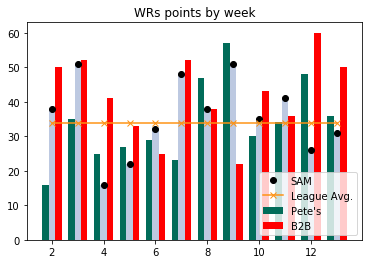

In [50]:
plpos='WR'
repetitive_slicing(plpos)
plt.legend(loc="lower right")
plt.show()

The final insight from the offensive player analysis is how important the relationship between skill player and quarterback is on a weekly basis.  The Jameis Winston injury has already been mentioned.  When examining the TE performance on the top teams, Cameron Brate experiences a significant fall off after week 8, corresponding to the Winston injury.  Despite the press around "Harvard to Harvard" connection (Ryan Fitzpatrick, Winsotn's backup qb) never really became comfortable with Brate.  The 8-10 point drop in weekly production cost SAM 3 games, and significantly better playoff seating.

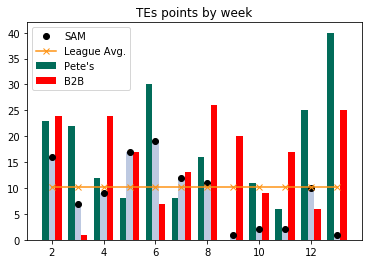

In [51]:
plpos='TE'
repetitive_slicing(plpos)
plt.show()

The analyses above caused me to wonder about the impact of key players on any particular Fantasy team's performance.  My assumption is that a combination of "studs" and "moneyball" is likely the winning strategy.  In a traditional league, this strategy is simple to execute, and happens naturally (all most players focus great energyon their first round pick), but in a salary league (as in this example), the industry has not focused as much energy on teaching the players the best draft strategy.

Consequently, there may be arbitrage opportunies that will significantly improve coaches performance if they can recognize them.  The analysis below, though limited to a single league, and subject to severe sampling bias due to the single observation, indicates that there are two likely places were "overpaying" in an auction draft could be a winning strategy: RBs and TEs.  These opportunities are likely due to different reasons.  In the RB case, it is exceptionally difficult to anticipate who will have a breakout season.  In 2017, it was Todd Gurley.  In 2016, it was David Johnson, and in 2015 it was Devonta Freeman.

The TE position is different.  Rob Gronkowski and Travis Kelce have been separated from the main grouping of TEs for the last two years.  In 2012 and 2013, it was Jimmy Graham that separated himself from teh pack.  In most cases, the TE has been paired with a strong quarterback for more than one season, which may provide an early indicator for next year's performance.

Though outside the scope of this project, the implications here are worth pursuing for salary leagues.  In particular, it is worth examining Cameron Brate as an inexpenisve pick with high upside now that Winston is back from injury (see TE plot above and below.)

Note: this analysis was originally done on all NFL players in 2017, but is reproduced here on league only data to avoid and data ownership issues.  The results and conclusions are substantially similar.

In [52]:
def repeated_overall_pos_analysis(player_pos):
    c_dict={"QB":"b","RB":"r","WR":"g","TE":"c"}
    selected_players=roster_df.loc[(roster_df.pos==player_pos)&(roster_df.FPTs>=2),:]
    
    position_group = selected_players.groupby('player_name')
    position_totals = position_group.sum()
    position_summary=position_totals.loc[position_totals.FPTs>49]
    plt.hist(position_summary["FPTs"],color=c_dict[player_pos])
    
    #plt.hist(selected_players["FPTs"],color=c_dict[player_pos])
    plt.xticks(rotation=45)
    title="Overall "+player_pos+" FPTs"
    plt.title(title)
    return

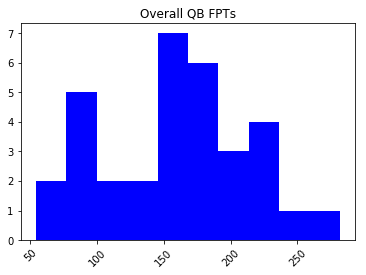

In [53]:
player_pos="QB"
repeated_overall_pos_analysis(player_pos)
plt.show()

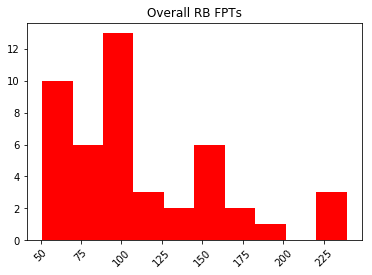

In [54]:
player_pos="RB"
repeated_overall_pos_analysis(player_pos)
plt.show()

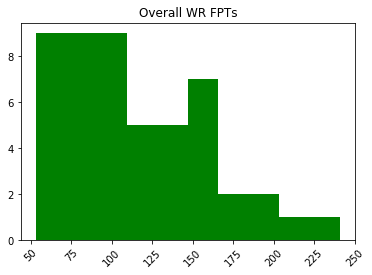

In [55]:
player_pos="WR"
repeated_overall_pos_analysis(player_pos)
plt.show()

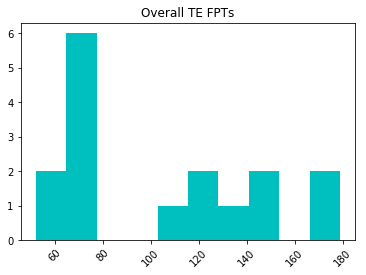

In [56]:
player_pos="TE"
repeated_overall_pos_analysis(player_pos)
plt.show()

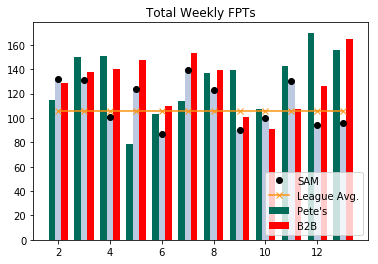

In [57]:

# Code used to recreate the chart without data scrubbing.

df1=roster_df.loc[(roster_df.team_num==3)&(roster_df.Status=="Active"),["week","player_name","team_num","Team","pos","FPTs"]]
df2= df1.loc[(df1.player_name!="A.Kamara"),:]
position_group = df2.groupby('week')
position_totals =position_group.sum()

df2=roster_df.loc[(roster_df.team_num==11)&(roster_df.Status=="Active"),["week","team_num","Team","pos","FPTs"]]
SAM_group = df2.groupby('week')
SAM_totals =SAM_group.sum()

df3=roster_df.loc[(roster_df.team_num==6)&(roster_df.Status=="Active"),["week","team_num","Team","pos","FPTs"]]
B2B_group = df3.groupby('week')
B2B_totals =B2B_group.sum()

df4=roster_df.loc[(roster_df.Status=="Active"),["week","team_num","Team","pos","FPTs"]]
ALL_group = df4.groupby('week')
ALL_totals = ALL_group.sum()
median_points=[ALL_totals.FPTs.median()/12 for x in ALL_totals.FPTs]

x = position_totals.index.values
y1= list(position_totals.FPTs.values)
y2=list(SAM_totals.FPTs.values)
y3=list(B2B_totals.FPTs.values)

ax = plt.subplot(111)
ax.bar(x-0.25, y1,width=0.25,color='#016c59',align='center',label="Pete's")
ax.bar(x, y2,width=0.25,color='#bdc9e1',align='center')
ax.bar(x+.25, y3,width=0.25,color='r',align='center',label='B2B')

ax.plot(x,y2,'o', lw=2, color='k', label='SAM')
ax.plot(x,median_points,'x-',color='#fe9212', label="League Avg.")

plt.title("Total Weekly FPTs")

ax.legend(loc='lower right',)
plt.show()